In [36]:
import numpy
import matplotlib.pyplot as plot
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Bei dem Datensatz handelt es sich um die Fahrzeit zur Arbeit. Dabei variiert die Fahrzeit je nach dem Zeitpunkt der Abfahrt.

In [258]:
df = pd.read_csv('Fahrzeit_sstd.csv',';')
df.head()

,Startzeit,Ankunft,Fahrzeit
0,06:58,07:39,00:41
1,06:42,07:31,00:49
2,06:45,07:32,00:47
3,06:21,07:04,00:43
4,06:43,07:32,00:49


In [259]:
df.dtypes

Startzeit    object
Ankunft      object
Fahrzeit     object
dtype: object

In [260]:
df['Fahrzeit'] = df['Fahrzeit'].str.replace(":","").astype(int)

In [261]:
df.dtypes

Startzeit    object
Ankunft      object
Fahrzeit      int32
dtype: object

Der Plot sieht ja völlig durcheinander aus. Das hängt mit der sortierung zusammen.

['06:58' '06:42' '06:45' '06:21' '06:43' '06:42' '06:41' '06:13' '07:01'
 '06:43' '06:36' '06:43' '06:52']
[41 49 47 43 49 47 47 40 55 48 47 47 50]


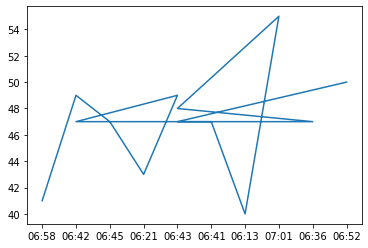

In [262]:
x = df.iloc[:, 0].values
y = df.iloc[:, 2].values
print(x)
print(y)

plot.plot(x, y)
plot.show()

In [263]:
df = df.sort_values('Startzeit', ascending=True)

Nach dem Sortieren sieht das schon viel besser aus.

['06:13' '06:21' '06:36' '06:41' '06:42' '06:42' '06:43' '06:43' '06:43'
 '06:45' '06:52' '06:58' '07:01']
[40 43 47 47 49 47 49 48 47 47 50 41 55]


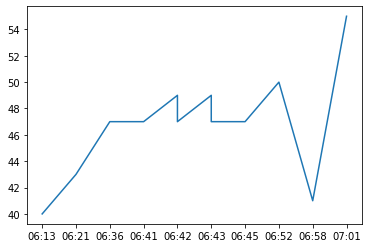

In [264]:
x = df.iloc[:, 0].values
y = df.iloc[:, 2].values
print(x)
print(y)

plot.plot(x, y)
plot.show()

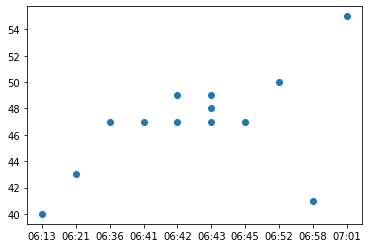

In [265]:
plot.scatter(x,y)
plot.show()

Das Problem ist, dass die Werte nicht gleichmäßig auf einer Skala von 06:00 bis 07:30 angezeigt werden. Die Zeitabstände wie 06:42 zu 06:43 haben ein gleiches Maß wie der Zeitabstand 06:21 zu 06:36.
Ich werde die Zeitwerte in Dezimaldarstellung umwandeln. So ist dann bspw. 06:30 -> 06,50

In [266]:
x2 = df['Startzeit'].str.split(':', expand=True )

In [267]:
x2.head()

,0,1
7,06,13
3,06,21
10,06,36
6,06,41
1,06,42


In [271]:
x2_m = x2[1].astype(int)
x2_h = x2[0].astype(int)
x2_m = round(x2_m*0.01666,2)
x_whole = x2_h+x2_m

In [272]:
x_whole = x_whole.to_numpy()

nun haben wir ein gleichmäßige Skala von 6,2 - 7,0. Zudem können wir die float Werte ohne probleme der LinearRegression füttern.

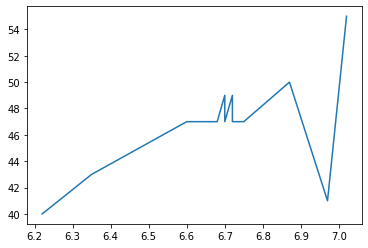

In [277]:
plot.plot(x_whole.reshape(-1, 1), y)
plot.show()

In [273]:
xTrain, xTest, yTrain, yTest = train_test_split(x_whole.reshape(-1, 1), y, test_size = 1/7, random_state = 0)
print(xTrain)
print(yTrain)

[[6.7 ]
 [6.87]
 [6.6 ]
 [6.72]
 [6.35]
 [6.72]
 [6.75]
 [6.68]
 [6.22]
 [6.7 ]
 [7.02]]
[49 50 47 47 43 48 47 47 40 47 55]


In [274]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)
print(linearRegressor)
yPrediction = linearRegressor.predict(xTest)
print(yPrediction)

LinearRegression()
[48.1511985  52.24576779]


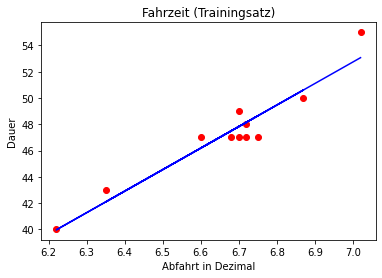

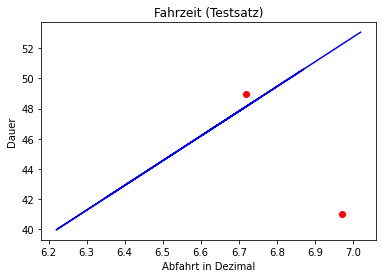

In [275]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Fahrzeit (Trainingsatz)')
plot.xlabel('Abfahrt in Dezimal')
plot.ylabel('Dauer')
plot.show()
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Fahrzeit (Testsatz)')
plot.xlabel('Abfahrt in Dezimal')
plot.ylabel('Dauer')
plot.show()

Im Grunde lässt sich erkennen, dass in der Abfahrtszeit von 06:00-7:00 Uhr, das frühe Losfahren auch eine kürzere Fahrtzeit bedeutet. Das hängt mit folgenden Ursachen zusammen: Zum einen Berufsverkehr, die um 08:00 beginnen, zum Anderen viele Schulstraßen die das Tempolimit auf 30 km/h ab 07:00 Uhr begrenzen.

Nichtsdestotrotz gibt es größere Abweichungen die immer wieder vorkommen. 